In [1]:
#importing libraries tensorflow, keras and matplotlib for creating
# models, layers, handling dataset, visualizing images

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [26]:
# each image size is 256*256
# in every process get 32 images
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 5

In [3]:
# loading Dataset to tensorflow
dataset = tf.keras.preprocessing.image_dataset_from_directory("Apple_leaf_diseas",
                                                   shuffle=True, 
                                                   image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                   batch_size = BATCH_SIZE)

Found 1730 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['healthy', 'rust', 'scab']

In [5]:
len(dataset)

55

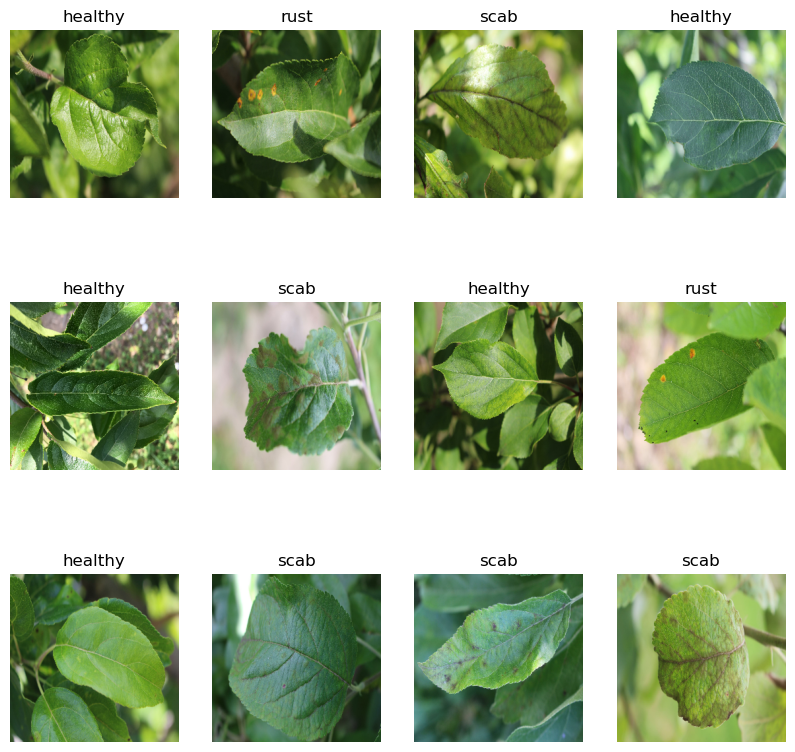

In [6]:
# visualizing 12 images just for test 
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    

In [7]:
# spliting datasets to 80% for training 
# 10% for testing and 10% for validation
trian_size = 0.8
len(dataset)*trian_size

44.0

In [8]:
train_ds = dataset.take(44)
len(train_ds)

44

In [9]:
test_ds = dataset.skip(44)
len(test_ds)

11

In [10]:
val_size = 0.1
len(dataset)*val_size

5.5

In [12]:
val_ds = test_ds.take(5)
len(val_ds)

5

In [17]:
test_ds = test_ds.skip(5)
len(test_ds)

6

In [14]:
# Datset partition function 
# this function splits the data in to three catagories training, testing and validation
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int (val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds        

In [15]:
# praparing the dataset
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

44

In [17]:
len(val_ds)

5

In [18]:
len(test_ds)

6

In [19]:
# caching and suffling the dataset to optimize performance druring traing
# and prefetch to ensure that the data is loaded efficiently
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


last step of preparing the data is to preprocessing and Augumentation 

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [27]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale, 
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
     
])

model.build(input_shape=input_shape)

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 12544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,323 (3.42 MB)

 Trainable params: 896,323 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3472 - loss: 1.1054 - val_accuracy: 0.4250 - val_loss: 1.0989
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4201 - loss: 1.0901 - val_accuracy: 0.3500 - val_loss: 1.2290
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4180 - loss: 1.0791 - val_accuracy: 0.3688 - val_loss: 1.0627
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4462 - loss: 1.0360 - val_accuracy: 0.5437 - val_loss: 0.8434
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5885 - loss: 0.8310 - val_accuracy: 0.7000 - val_loss: 0.6525


In [33]:
model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.6932 - loss: 0.6574


[0.6408376693725586, 0.6927083134651184]